## This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
1. Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
2. There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
3. The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.



In [2]:
#imorting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## STEP ONE: ASKING QUESTIONS
Q1. How much has the rating improved over the years

Q2. Visualize the popularity of the movies over the years

Q3. What level of popularity receives the highest revenue?

Q4. What level of runtime associated with the highest voting score?

Q5. Who are the top 5 cast memebers with highest movie voting (check only first 200 top voted movies)?

Q6. Which genres are most popular

Q7: What are the top 5 movies with the highest profit






## STEP TWO: DATA WRANGLING -INSPECTING THE DATASET
In this section we will do the following:

1. Drop unecessary columns
2. Check for missing data
3. fill in missing data
4. Check for duplicates
4. Ensure correct datatype of the column

In [3]:
#reading data from my account on github and storing it in a data frame
df = pd.read_csv("https://raw.githubusercontent.com/code-hack-dot-com/investingating-a-dataset/3ea1d0a036fa0862525a1d2774724c5506bbe643/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### DROP UNECCESSARY COLUMNS

    homepage, tagline, overview, id, imdb_id, and vote_count seem like columns without any effect on the data. So lets drop them

In [4]:
#Lets frop these columns 
df.drop(["homepage", "tagline", "overview", "id", "imdb_id", "vote_count", "keywords", "release_date"], axis  = 1, inplace= True)

In [5]:
#lets check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


#### Popularity to revenue are up to date. Since we cant fill in the empty cast, lets drop it

In [6]:
# process of dropping empty values in cast columns
df.dropna(subset = ["cast"], inplace = True)

In [7]:

df["cast"].isnull().sum()

0

#### finding the total number of empty columns in "cast" column, this turned out to be 0 since we have dropped all the null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10790 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10790 non-null  float64
 1   budget                10790 non-null  int64  
 2   revenue               10790 non-null  int64  
 3   original_title        10790 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10752 non-null  object 
 6   runtime               10790 non-null  int64  
 7   genres                10768 non-null  object 
 8   production_companies  9800 non-null   object 
 9   vote_average          10790 non-null  float64
 10  release_year          10790 non-null  int64  
 11  budget_adj            10790 non-null  float64
 12  revenue_adj           10790 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


#### When we check the infor of the data above, we can see that the cast value is now 10790

#### Now that cast is done, lets find the frequency of director and fill the empty cells with the highest frequency.

#### After analysis, we see that the number of null valus for directors is too high so we just replace it with "Missing" category. thee number of "missing" directors is quite high so it will be unrealistic to fill it with the highest frequecy

In [10]:
df["director"].fillna("Missing", inplace = True)
df["director"].value_counts()

Woody Allen                45
Missing                    38
Clint Eastwood             34
Steven Spielberg           29
Martin Scorsese            28
                           ..
Yoshihiro Nishimura         1
Jon Poll                    1
Jean-StÃ©phane Sauvaire     1
Gianni Di Gregorio          1
Harold P. Warren            1
Name: director, Length: 5029, dtype: int64

In [11]:
# from doing this, we can see that "director" has been accounted for
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10790 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10790 non-null  float64
 1   budget                10790 non-null  int64  
 2   revenue               10790 non-null  int64  
 3   original_title        10790 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10790 non-null  object 
 6   runtime               10790 non-null  int64  
 7   genres                10768 non-null  object 
 8   production_companies  9800 non-null   object 
 9   vote_average          10790 non-null  float64
 10  release_year          10790 non-null  int64  
 11  budget_adj            10790 non-null  float64
 12  revenue_adj           10790 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


#### Next we deal with genre, since comedy and drama have just one difference in the count, lets just fill half of the missing genre with "comedy", and the other half with "drama", to maintain the frequency

In [12]:
df["genres"].value_counts()

Comedy                                     712
Drama                                      711
Drama|Romance                              289
Comedy|Drama                               280
Documentary                                278
                                          ... 
Family|Adventure|Animation|Comedy            1
Drama|History|Crime                          1
Science Fiction|Horror|Action|Thriller       1
Action|Thriller|Science Fiction|Mystery      1
Mystery|Science Fiction|Thriller|Drama       1
Name: genres, Length: 2030, dtype: int64

In [13]:
#We have a 22 missing genres
df["genres"].isnull().sum()

22

In [15]:
empty_genres = df[df['genres'].isnull()].index.tolist()
empty_genres

[424,
 997,
 1712,
 1897,
 2370,
 2376,
 2853,
 3279,
 4547,
 4732,
 4797,
 4890,
 5830,
 5934,
 6043,
 6530,
 8234,
 8614,
 8878,
 9307,
 9799,
 10659]

In [16]:
# we have filled 11 empty columns with "comedy" and the other 11 with "Drama", so no missing data anymore in this column
for index, value in enumerate(empty_genres):
  if(index < 11):
    df["genres"][value] = "Comedy"
  else:
    df["genres"][value] = "Drama"

df["genres"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Comedy                                     723
Drama                                      722
Drama|Romance                              289
Comedy|Drama                               280
Documentary                                278
                                          ... 
Family|Adventure|Animation|Comedy            1
Drama|History|Crime                          1
Science Fiction|Horror|Action|Thriller       1
Action|Thriller|Science Fiction|Mystery      1
Mystery|Science Fiction|Thriller|Drama       1
Name: genres, Length: 2030, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10790 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10790 non-null  float64
 1   budget                10790 non-null  int64  
 2   revenue               10790 non-null  int64  
 3   original_title        10790 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10790 non-null  object 
 6   runtime               10790 non-null  int64  
 7   genres                10790 non-null  object 
 8   production_companies  9800 non-null   object 
 9   vote_average          10790 non-null  float64
 10  release_year          10790 non-null  int64  
 11  budget_adj            10790 non-null  float64
 12  revenue_adj           10790 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.4+ MB


#### Info from above shows that genre is accounted for. Next is production companies

In [17]:
df["production_companies"].isnull().sum()

990

#### The number of missing "production companies" is quite high, we can replace it with "missing", but if we do this, we may not be able to give exact insight if the production company affects the number of ratings, and we may not be able to know the exact production companies, but lets try that and see

In [20]:
df["production_companies"].fillna("Missing", inplace =True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10790 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10790 non-null  float64
 1   budget                10790 non-null  int64  
 2   revenue               10790 non-null  int64  
 3   original_title        10790 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10790 non-null  object 
 6   runtime               10790 non-null  int64  
 7   genres                10790 non-null  object 
 8   production_companies  10790 non-null  object 
 9   vote_average          10790 non-null  float64
 10  release_year          10790 non-null  int64  
 11  budget_adj            10790 non-null  float64
 12  revenue_adj           10790 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.4+ MB


#### We are done dealing with missing values, next lets drop duplicates, we have just one duplicated column so lets drop it.

In [22]:
df.duplicated().value_counts()

False    10789
True         1
dtype: int64

In [23]:
df.drop_duplicates(inplace = True)

In [25]:
#Now we have no duplicated column
df.duplicated().value_counts()

False    10789
dtype: int64

#### Finally, lets deal with the datatype
    Just the "release year" is in the wrong datatype so lets change it to "datetime" datatype

In [26]:
# changing the datatype from int to datetime
df["release_year"] = pd.to_datetime(df["release_year"], format = "%Y")
df["release_year"]

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
10861   1966-01-01
10862   1966-01-01
10863   1966-01-01
10864   1966-01-01
10865   1966-01-01
Name: release_year, Length: 10789, dtype: datetime64[ns]

# The cleaning is done! Lets save the clean data in a new file

In [27]:
#saving to a new file
df.to_csv("tmdb_movies_V2.csv")

## STEP 3: EXPLORATORY DATA ANALYSIS

### First of all, lets see the description of the dataset

In [28]:
#lets try to understand the data overall
df.describe()

,popularity,budget,revenue,runtime,vote_average,budget_adj,revenue_adj
count,10789.000000,1.078900e+04,1.078900e+04,10789.000000,10789.000000,1.078900e+04,1.078900e+04
mean,0.649943,1.472523e+07,4.010415e+07,102.346835,5.968607,1.767095e+07,5.172768e+07
std,1.002792,3.099937e+07,1.173725e+08,30.998457,0.932325,3.439754e+07,1.450832e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.209655,0.000000e+00,0.000000e+00,90.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.385492,0.000000e+00,0.000000e+00,99.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.718275,1.600000e+07,2.463747e+07,112.000000,6.600000,2.103337e+07,3.411637e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,4.250000e+08,2.827124e+09


In [29]:
#first lets create a column that calculates the profit of a movie by subtracting the revenue from the budget

df["profit"] = df["revenue_adj"] - df["budget_adj"]

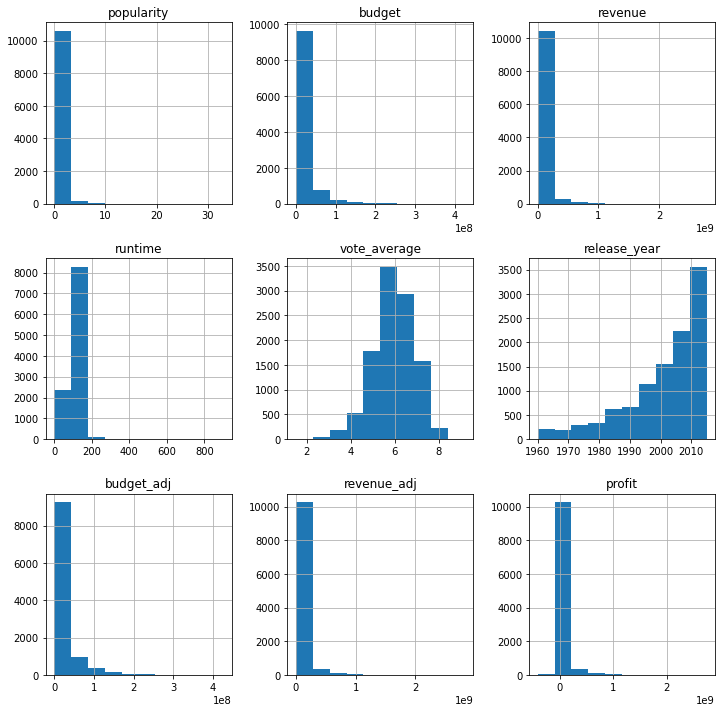

In [31]:
#lets create a histogram for all columns, from the histograms below we can see that these numerical features are mostly skewed to the left 
df.hist(figsize = (12,12));

#Lets try to plot the correlatin between some variables

Text(0.5, 1.0, 'Correlation between the runtime and voting avarage')

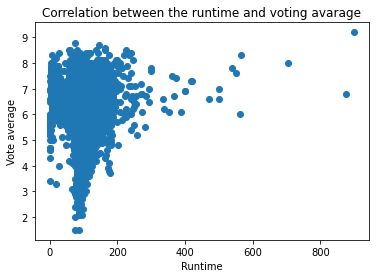

In [34]:
#Lets look at the correlation between the runtime and the voting average, 
plt.scatter(df["runtime"],df["vote_average"])
plt.xlabel("Runtime")
plt.ylabel("Vote average")
plt.title("Correlation between the runtime and voting avarage")

#### from the graph above, there seems to be no correlation between the runtime and the vote average

Text(0.5, 1.0, 'Correlation between the budget and profit')

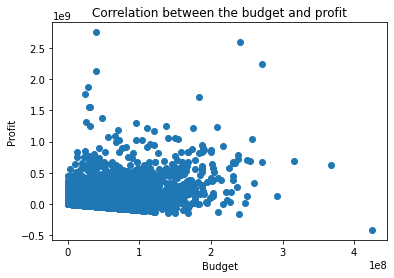

In [35]:
#Lets look at the correlation between the budget and the profit
plt.scatter(df["budget_adj"],df["profit"])
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.title("Correlation between the budget and profit")

#### from the graph above, there seems to be no correlation between the budget and the profit

Text(0.5, 1.0, 'Correlation between the release year and popularity')

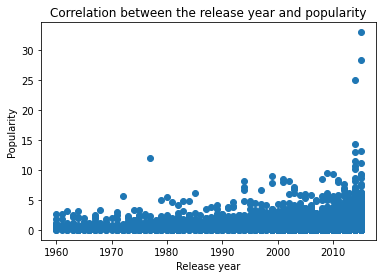

In [36]:
#Lets look at the correlation between the release_year and the popularity
plt.scatter(df["release_year"],df["popularity"])
plt.xlabel("Release year")
plt.ylabel("Popularity")
plt.title("Correlation between the release year and popularity")

#### from the graph above, there seems to be no correlation between the release_year and the popularity

#### Q1. How much has the rating improved over the years


---





Text(0.5, 1.0, 'Rating for each year')

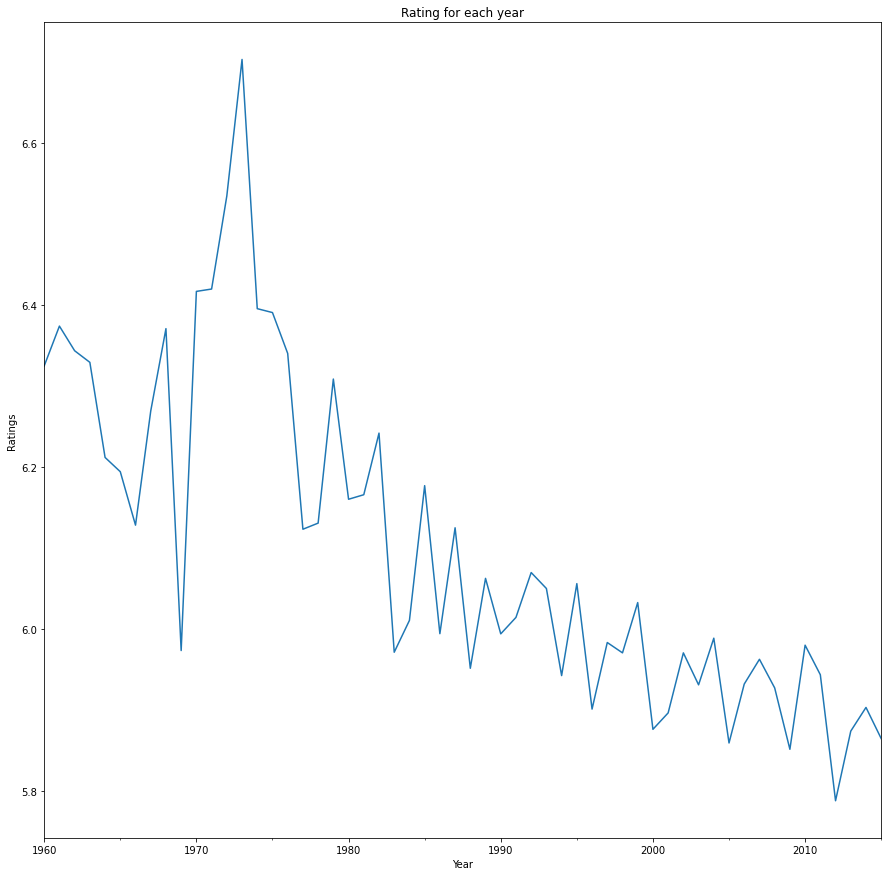

In [37]:
# We need to calculate the overall rating for each year
df.groupby("release_year")["vote_average"].mean().plot( kind = "line", figsize = (15,15));
plt.xlabel("Year")
plt.ylabel("Ratings")
plt.title("Rating for each year")

In [38]:
# to get a clearer insight, we can calculate the mean of 1960 ratings and that of 2015 and subtract them
df_1960 = df.groupby("release_year").get_group("1960-01-01")["vote_average"].mean()
df_2015 = df.groupby("release_year").get_group("2015-01-01")["vote_average"].mean()
df_2015 - df_1960

-0.46042673107890586

    The vote decreased by 0.46

Q2. Visualize the popularity of the movies over the years




Text(0.5, 1.0, 'Release year vs popularity')

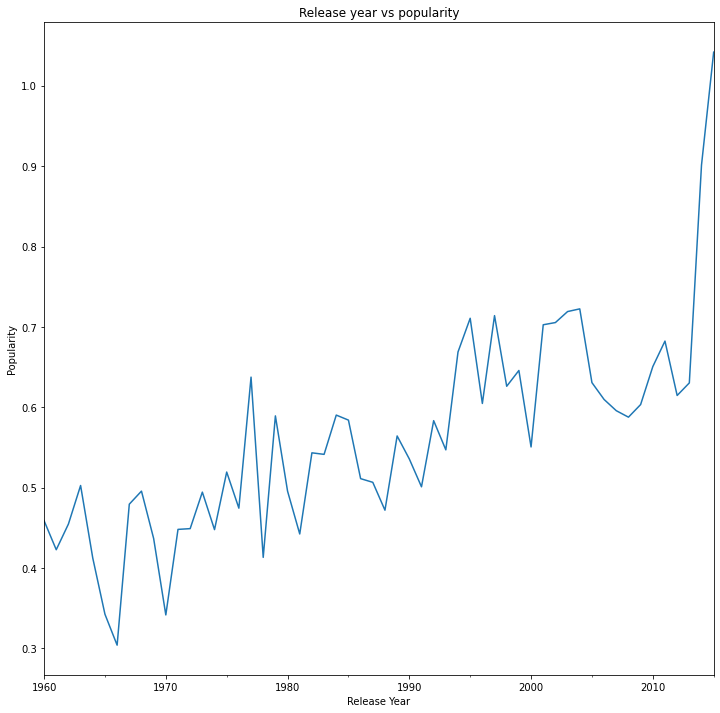

In [39]:
df.groupby("release_year")["popularity"].mean().plot(kind = "line", figsize = (12,12));
plt.xlabel("Release Year")
plt.ylabel("Popularity")
plt.title("Release year vs popularity")

In [40]:
# to get a clearer insight, we can calculate the mean of 1960 ratings and that of 2015 and subtract them
df_popularity_1960 = df.groupby("release_year").get_group("1960-01-01")["popularity"].mean()
df_popularity_2015 = df.groupby("release_year").get_group("2015-01-01")["popularity"].mean()
df_popularity_2015 - df_popularity_1960

0.5828735747785828

    The popularity increased by 0.582

Q3. What level of popularity receives the highest revenue?


In [41]:
#first we get the min, 25%, 75%, and max values of popularity
df["popularity"].describe()

count    10789.000000
mean         0.649943
std          1.002792
min          0.000065
25%          0.209655
50%          0.385492
75%          0.718275
max         32.985763
Name: popularity, dtype: float64

In [42]:
#next, we create bins and labels, lets create a function to make our code less repetitive

def bins_labels(bins, labels, cut_by, find_out):
  df["value"] = pd.cut(df[cut_by], bins=bins, labels = labels)
  return(df.groupby("value")[find_out].mean())

Text(0.5, 1.0, 'popularity level vs revenue')

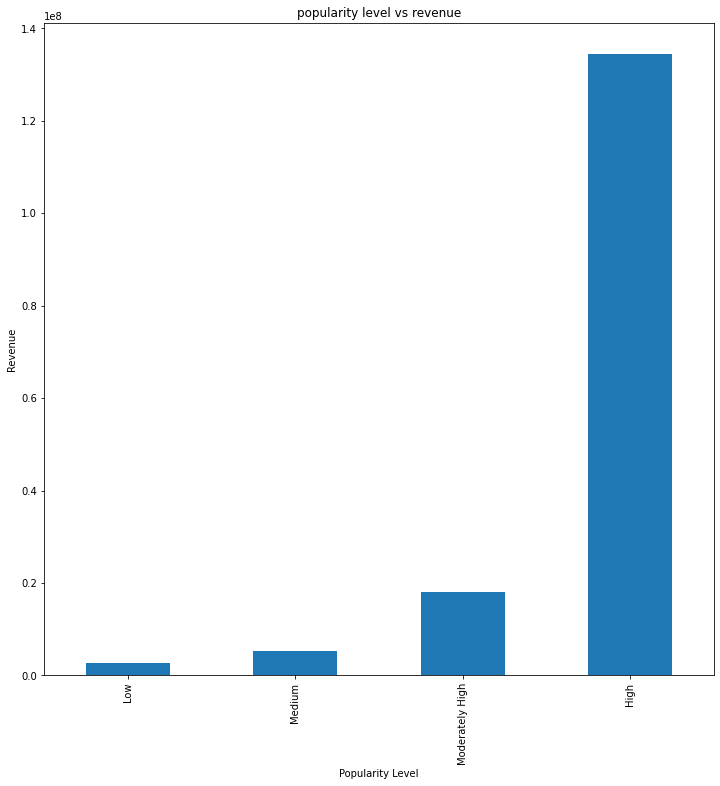

In [43]:
labels = ['Low', 'Medium', 'Moderately High', 'High']
bins = [0.000065, 0.209655,0.385492,0.718275, 32.985763]
popularity_level = bins_labels(bins, labels, 'popularity', 'revenue')
popularity_level.plot(kind = "bar",  figsize=(12,12))
plt.xlabel("Popularity Level")
plt.ylabel("Revenue")
plt.title("popularity level vs revenue")

Q3. What level of runtime associated with the highest voting score?

In [44]:
df["runtime"].describe()

count    10789.000000
mean       102.346835
std         30.998457
min          0.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

Text(0.5, 1.0, 'Runtime level vs vote average')

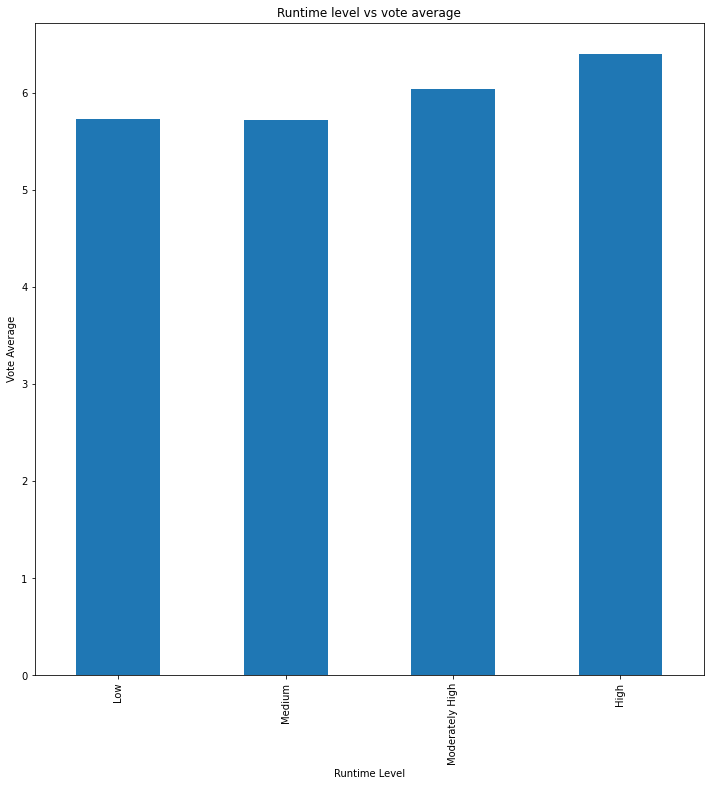

In [46]:
#lets use the function we created above
labels = ['Low', 'Medium', 'Moderately High', 'High']
bins = [0.000000, 90.000000,99.000000,112.000000, 900.000000]
runtime_level = bins_labels(bins, labels, 'runtime', 'vote_average')
runtime_level.plot(kind = "bar",  figsize=(12,12))

plt.xlabel("Runtime Level")
plt.ylabel("Vote Average")
plt.title("Runtime level vs vote average")


#### The highest runtime movies have highest voting scores

In [47]:
runtime_level

value
Low                5.738387
Medium             5.725104
Moderately High    6.046131
High               6.403799
Name: vote_average, dtype: float64

Q4. Who are the top 5 cast memebers with highest movie voting (check only first 200 top voted movies)?


In [48]:
# Lets create a new dataframe with a sorted "voting average"
df_highest_rating = df.sort_values(['vote_average'], ascending=[False])

In [49]:
df_highest_rating.head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit,value
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,Missing,9.2,2011-01-01,0.0,0.0,0.0,High
1200,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,Missing,8.8,2014-01-01,0.0,0.0,0.0,Low
6911,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145,Music,SMV Enterprises|Columbia Music Video|EMI,8.7,2006-01-01,0.0,0.0,0.0,High
2401,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",Missing,163,Music,Missing,8.6,2010-01-01,0.0,0.0,0.0,High
8411,0.302908,0,0,Queen - Rock Montreal,Freddie Mercury|Roger Taylor|John Deacon|Brian...,Saul Swimmer,138,Music,Edel records GmbH,8.5,1981-01-01,0.0,0.0,0.0,High
3690,0.321341,0,0,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,80,Adventure|Documentary,Red Bull Media House|Brain Farm Digital Cinema,8.5,2011-01-01,0.0,0.0,0.0,Low
8839,0.157001,0,0,Dave Chappelle: Killin' Them Softly,Dave Chappelle,Stan Lathan,57,Comedy,Missing,8.5,2000-01-01,0.0,0.0,0.0,Low
3224,0.224721,0,0,John Mayer: Where the Light Is Live in Los Ang...,John Mayer|Steve Jordan|Pino Palladino|David R...,Missing,164,Music,Missing,8.5,2008-01-01,0.0,0.0,0.0,High
5830,0.248944,0,0,Doctor Who: The Time of the Doctor,Matt Smith|Jenna Coleman,James Payne,60,Drama,Missing,8.5,2013-01-01,0.0,0.0,0.0,Low
8221,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,Martin Scorsese|Michael Henry Wilson,225,Documentary,Miramax Films|British Film Institute (BFI),8.5,1995-01-01,0.0,0.0,0.0,High


Text(0.5, 1.0, 'Top 5 cast members and thier appearance in top rated movies')

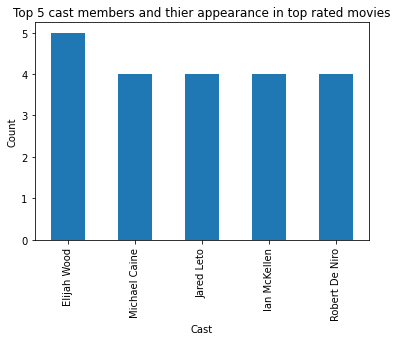

In [50]:
# lets split the charactets by "|" and select only the top 200 ratings
all_cast =df_highest_rating["cast"].head(200).str.cat(sep='|').split('|')
#transfer it to a dataframe
values = pd.DataFrame({'value' :all_cast})
#value count to count the number of times each cast appeared
values = values['value'].value_counts().head(5).plot(kind = "bar")
plt.xlabel("Cast")
plt.ylabel("Count")
plt.title("Top 5 cast members and thier appearance in top rated movies")

#### From the chart above, we can see that Elijah wood, Micheal Caine, Jared Leto, ian Mckellen, Robert De Niro have the highest rated movies

Q5. Which genres are most popular



Text(0.5, 1.0, 'Top 5 genres and thier appearance in top voted movies')

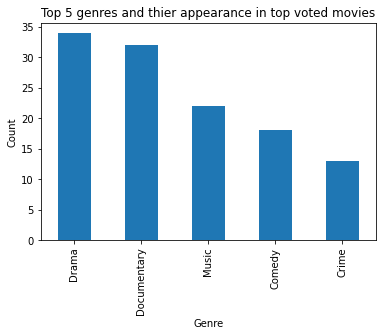

In [51]:
# Lets create a new dataframe with a sorted "voting average"
df_popularity = df.sort_values(['popularity'], ascending=[False])
# lets split the characters by "|" and select only the top 100 popular
all_genre =df_highest_rating["genres"].head(100).str.cat(sep='|').split('|')
#transfer it to a dataframe
values = pd.DataFrame({'value' :all_genre})
#value count to count the number of times each genre appeared
values = values['value'].value_counts().head(5).plot(kind = "bar")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 5 genres and thier appearance in top voted movies")

#### The 5 most popular genres are: Drama, Documentary, Music Comedy and crime

Q6: What are the top 5 movies with the highest profit




In [52]:
df_profit = df.sort_values(['profit'], ascending=[False])
df_profit_five = df_profit.head(5)
df_profit_five

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit,value
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977-01-01,3.957559e+07,2.789712e+09,2.750137e+09,High
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009-01-01,2.408869e+08,2.827124e+09,2.586237e+09,High
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997-01-01,2.716921e+08,2.506406e+09,2.234714e+09,High
10594,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,7.2,1973-01-01,3.928928e+07,2.167325e+09,2.128036e+09,High
9806,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,7.3,1975-01-01,2.836275e+07,1.907006e+09,1.878643e+09,High


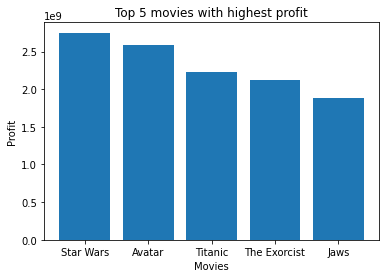

In [53]:
plt.bar(["Star Wars", "Avatar", "Titanic", "The Exorcist","Jaws" ], [2.750137e+09,2.586237e+09,2.234714e+09,2.128036e+09,1.878643e+09]);
plt.title("Top 5 movies with highest profit")
plt.xlabel("Movies")
plt.ylabel("Profit");

#### The five movies with the highest profit are: Star wars, Avatar, Titanic, The exorsist and Jaws.

## STEP FOUR: DRAWING CONCLUSIONS
First thing we notice is that all the variables are not normally distributed from the histogram displayed: Let us draw conclusion the answered to the questions posed.

**RESULTS**

Q1. Between the year 1960 and 2015, there was an overall decrease in the average ratings of all movies. with a value of 0.4

Q2.  Over the years there is an increase in the popularity of the movies with about 0.58

Q3. Movies with higher popularity had higher revenue

Q4. The top 5 cast members with highest movie voting are: Elijah wood, Micheal Caine, Jared Leto, ian Mckellen, Robert De Niro

Q5. The 5 most popular genres are: Drama, Documentary, Music Comedy and crime

Q6. The five movies with the highest profit are: Star wars, Avatar, Titanic, The exorsist and Jaws.

**LIMITATIONS**

1. There is no much correlation between the numerical features in the dataset
2. Since most features are categorical, we cannot come to a conclusion regarding the correlation between such features

    We can still make some more analysing top five most successful movie directors or op five most successful movie production companies. In such case, the consept is the same.